<a href="https://colab.research.google.com/github/sabasyed00/innomatics_assignments/blob/main/DescriptiveAnalysistTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Innomatics assignment Task 1 - **Descriptive statistics**

Task statement
Write a Jupyter Notebook explaining all the Descriptive Statistics. 
* Mean
* Median
* Mode
* Variance
* Standard Deviation
* Correlation
* Normal Distribution (use references)
* Feature of Normal Distribution
* Positively Skewed & Negatively Skewed Normal Distribution
* Effect on Mean, Median and Mode due to Skewness
* Explain QQ Plot and show the implementation of the same
* Explain Box Cox and show the implementation of the same







## Descriptive statistics
  Descriptive statistics are very important because if we simply presented our raw data it would be hard to visualize what the data was showing, especially if there was a lot of it. Descriptive statistics therefore enables us to present the data in a more meaningful way, which allows simpler interpretation of the data.Typically there are two ways to perform descriptive statistics
  * By measuring the central tendency 
  * By measuring the spread of the data 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import norm
import statistics as stats 

import statsmodels.api as sm  


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Read the dataset
df = pd.read_csv("data (1).csv")


In [5]:
#Displaying first25 rows of the dataset
df.head(25)


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [6]:
#Displaying last 25 rows of the dataset
df.tail(25)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
25,35000,25000,4,0,449400,Professional,2
26,39000,8000,4,0,556920,Under-Graduate,1
27,40000,10000,4,0,412800,Under-Graduate,1
28,42000,15000,4,0,488880,Graduate,1
29,43000,12000,4,0,619200,Graduate,1
30,45000,25000,6,0,523800,Graduate,3
31,45000,40000,6,3500,507600,Professional,2
32,45000,10000,2,1000,437400,Post-Graduate,1
33,45000,22000,4,2500,610200,Post-Graduate,1
34,46000,25000,5,3500,596160,Graduate,1


In [7]:
df.shape

(50, 7)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder 


le = LabelEncoder()
df['Highest_Qualified_Member'] = le.fit_transform(df['Highest_Qualified_Member'])

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Mthly_HH_Income           50 non-null     int64
 1   Mthly_HH_Expense          50 non-null     int64
 2   No_of_Fly_Members         50 non-null     int64
 3   Emi_or_Rent_Amt           50 non-null     int64
 4   Annual_HH_Income          50 non-null     int64
 5   Highest_Qualified_Member  50 non-null     int64
 6   No_of_Earning_Members     50 non-null     int64
dtypes: int64(7)
memory usage: 2.9 KB


In [12]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.740000,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,1.613843,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,0.000000,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,0.000000,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,2.000000,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,3.000000,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000,4.000000


## Mean
  The mean is equal to the sum of all the values in the data set divided by the number of values in the data set.
  

                            ̅𝑋 = Σ𝒳 𝙡 𝐧 

In [13]:
df.mean() #function


Mthly_HH_Income              41558.00
Mthly_HH_Expense             18818.00
No_of_Fly_Members                4.06
Emi_or_Rent_Amt               3060.00
Annual_HH_Income            490019.04
Highest_Qualified_Member         1.74
No_of_Earning_Members            1.46
dtype: float64

In [16]:
mean = []
features = []
for clm in df.columns:
    features.append(clm)
    mean.append(stats.mean(df[clm]))       
mean_df1 = pd.DataFrame(mean, index=features)
mean_df1.columns = ['Mean']
mean_df1

,Mean
Mthly_HH_Income,41558.00
Mthly_HH_Expense,18818.00
No_of_Fly_Members,4.06
Emi_or_Rent_Amt,3060.00
Annual_HH_Income,490019.04
Highest_Qualified_Member,1.74
No_of_Earning_Members,1.46


In [51]:
import numpy as np
Mean=print(np.mean(df['Mthly_HH_Income']))

41558.0


In [25]:
list_num = df['Mthly_HH_Income'].values
sum_num = sum(list_num)
print(format(sum_num))
Mean = sum_num/len(list_num)
print(format(Mean))

2077900
41558.0


<function matplotlib.pyplot.legend>

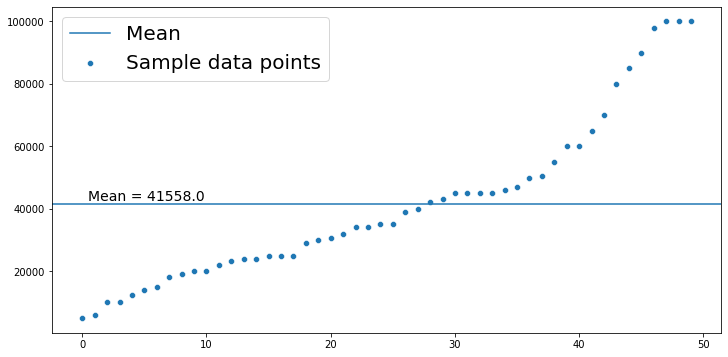

In [26]:

plt.figure(figsize =(12,6))
graph =sns.scatterplot(y=list_num , x = range(len(list_num)), label = "Sample data points", marker = 'o',)
graph.axhline(Mean, label="Mean")
plt.text(0.5, Mean+1000, 'Mean = 41558.0', size ='14')
plt.legend(loc="upper left", fontsize = 20 )
plt.legend

## Median
  The median is the middle score for a set of data that has been arranged in order of magnitude.
  
  Formula of median
If N is odd
$$ Median =\left(\frac{N + 1}{2}\right)^{th}\ Observation\ $$
If N is even
¶
Median = \frac{\left(\frac{N}{2}\right)^{th}\left(\frac{N}{2}+1\right)^{th} Observation}{2} $$

In [27]:
df.median()

Mthly_HH_Income              35000.0
Mthly_HH_Expense             15500.0
No_of_Fly_Members                4.0
Emi_or_Rent_Amt                  0.0
Annual_HH_Income            447420.0
Highest_Qualified_Member         2.0
No_of_Earning_Members            1.0
dtype: float64

In [28]:
median = []
features = []
for clm in df.columns:
    features.append(clm)
    median.append(stats.median(df[clm]))       
median_df1 = pd.DataFrame(median, index=features)
median_df1.columns = ['Median']
median_df1

,Median
Mthly_HH_Income,35000.0
Mthly_HH_Expense,15500.0
No_of_Fly_Members,4.0
Emi_or_Rent_Amt,0.0
Annual_HH_Income,447420.0
Highest_Qualified_Member,2.0
No_of_Earning_Members,1.0


[  5000   6000  10000  10000  12500  14000  15000  18000  19000  20000
  20000  22000  23400  24000  24000  25000  25000  25000  29000  30000
  30500  32000  34000  34000  35000  35000  39000  40000  42000  43000
  45000  45000  45000  45000  46000  47000  50000  50500  55000  60000
  60000  65000  70000  80000  85000  90000  98000 100000 100000 100000]
Even Number:50
Median is: 35000.0


<function matplotlib.pyplot.legend>

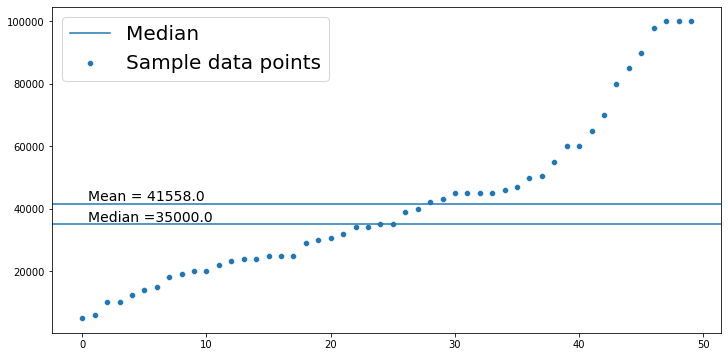

In [31]:
n_num = df['Mthly_HH_Income'].sort_values(ascending= True)
print(n_num.values)
n = len(n_num)
print( "Even Number:{}".format(n))
if n % 2 == 0:
    median1 = n_num[n//2]
    median2 = n_num[n//2 - 1]
    median = (median1 + median2)/2
else:
    median = n_num[n//2]
print("Median is: " + str(median))
plt.figure(figsize =(12,6))
graph =sns.scatterplot(y=list_num , x = range(len(list_num)), label = "Sample data points", marker = 'o',)
graph.axhline(median, label="Median")
plt.text(0.5,median+1000, 'Median =35000.0', size ='14')
plt.legend(loc="upper left", fontsize = 20 )
graph.axhline(Mean, label="Mean")
plt.text(0.5, Mean+1000, 'Mean = 41558.0', size ='14')
plt.legend

##Mode
  The mode is the most frequent score in our data set

In [32]:
df.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,0,1


In [33]:
mode = []
features = []
for clm in df.columns:
    features.append(clm)
    mode.append(stats.mode(df[clm]))       
mode_df1 = pd.DataFrame(mode, index=features)
mode_df1.columns = ['Mode']
mode_df1

,Mode
Mthly_HH_Income,45000
Mthly_HH_Expense,25000
No_of_Fly_Members,4
Emi_or_Rent_Amt,0
Annual_HH_Income,590400
Highest_Qualified_Member,0
No_of_Earning_Members,1


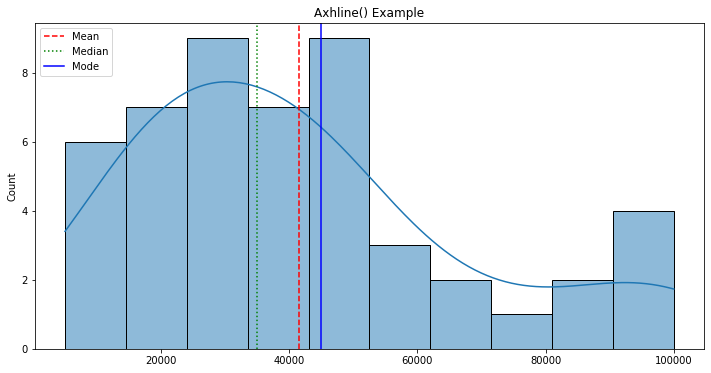

In [35]:
plt.figure(figsize =(12,6))
ax_hist =sns.histplot(list_num, kde=True, bins= 10)
ax_hist.axvline(Mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle=':', label="Median")
ax_hist.axvline(mode[0], color='b', linestyle='-', label="Mode")
plt.title('Axhline() Example')
plt.legend(loc ='upper left')

##Variance 
   Variance measures how far are data points spread out from the mean

In [36]:
df.var()

Mthly_HH_Income             6.811009e+08
Mthly_HH_Expense            1.461733e+08
No_of_Fly_Members           2.302449e+00
Emi_or_Rent_Amt             3.895551e+07
Annual_HH_Income            1.024869e+11
Highest_Qualified_Member    2.604490e+00
No_of_Earning_Members       5.391837e-01
dtype: float64

##Standard Deviation 
   The square root of Variance is called the Standard Deviation. 


In [37]:
df.std()

Mthly_HH_Income              26097.908979
Mthly_HH_Expense             12090.216824
No_of_Fly_Members                1.517382
Emi_or_Rent_Amt               6241.434948
Annual_HH_Income            320135.792123
Highest_Qualified_Member         1.613843
No_of_Earning_Members            0.734291
dtype: float64

##Correlation
  Correlation is a statistical measure that expresses the extent to which two variables are linearly related.

In [38]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 



In [40]:
print("*"*50+"Pearson:"+"*"*50)
df.corr(method="pearson")

**************************************************Pearson:**************************************************


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,-0.013880,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,-0.019001,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.056504,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.013615,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,-0.030077,0.296679
Highest_Qualified_Member,-0.013880,-0.019001,0.056504,-0.013615,-0.030077,1.000000,0.154650
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,0.154650,1.000000


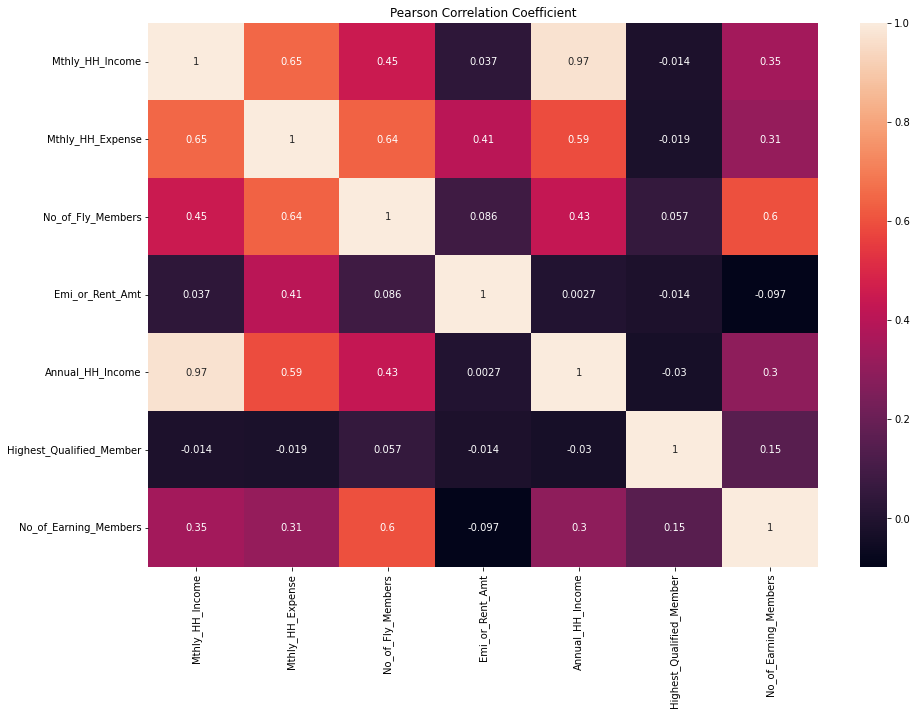

In [46]:
plt.figure(figsize=(15,10))  
plt.title("Pearson Correlation Coefficient")
sns.heatmap(df.corr(method="pearson"),annot=True)

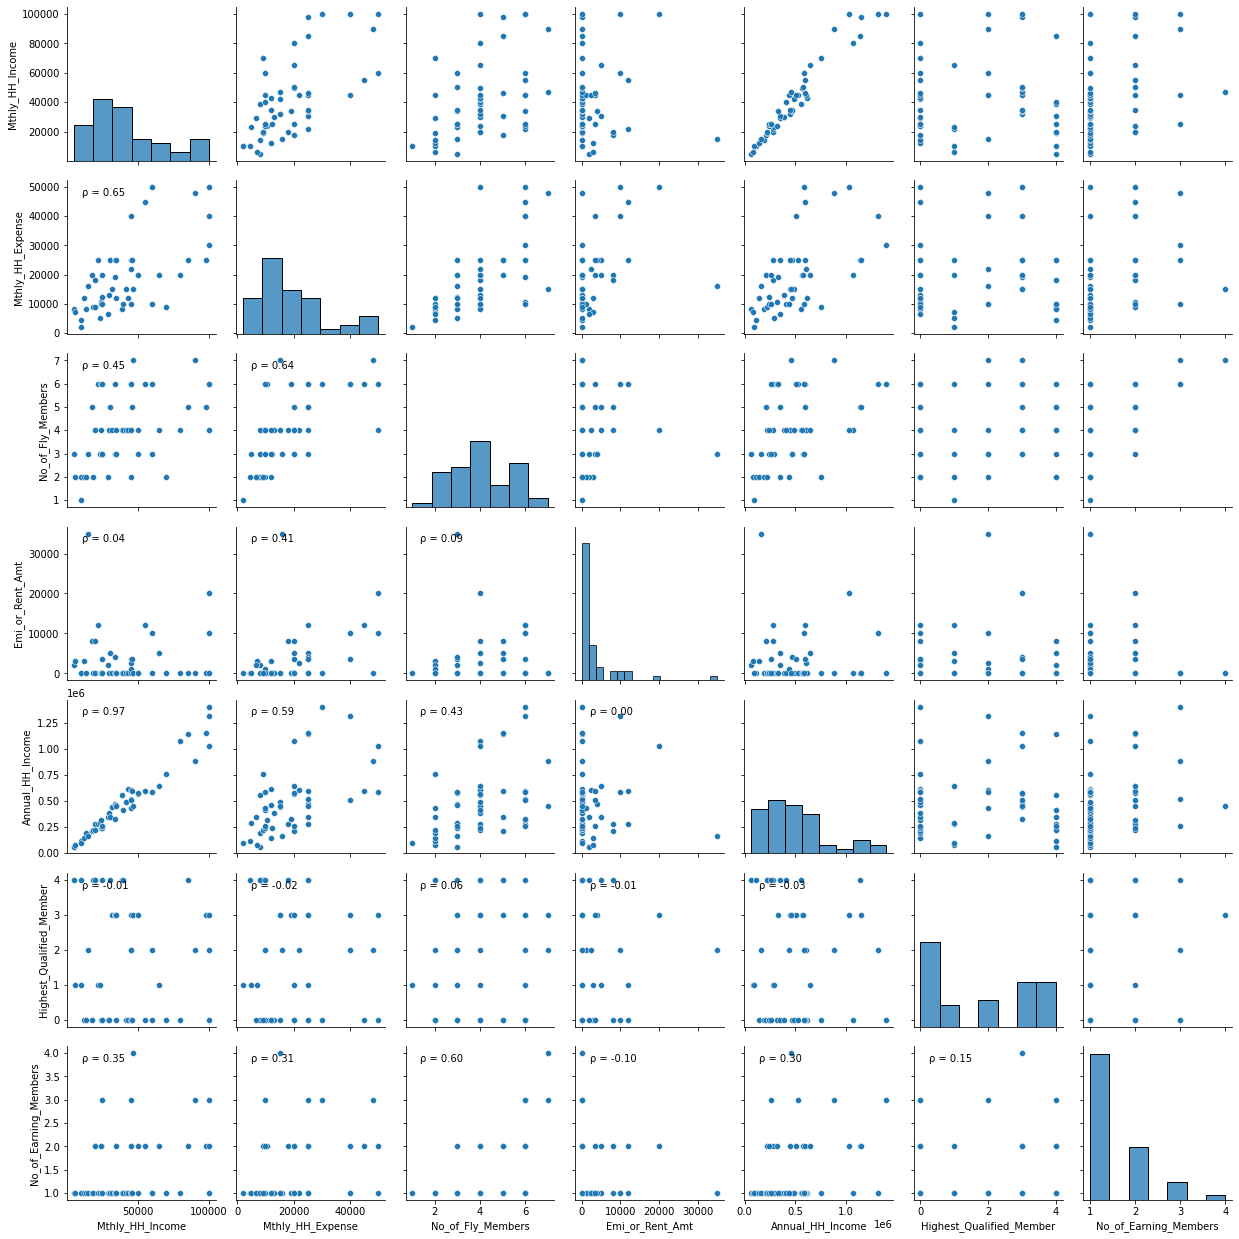

In [49]:
def corrfunction(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(df)
g.map_lower(corrfunction)
plt.show()

##Normal Distribution
  In probability theory, a normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is

{\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}{\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}

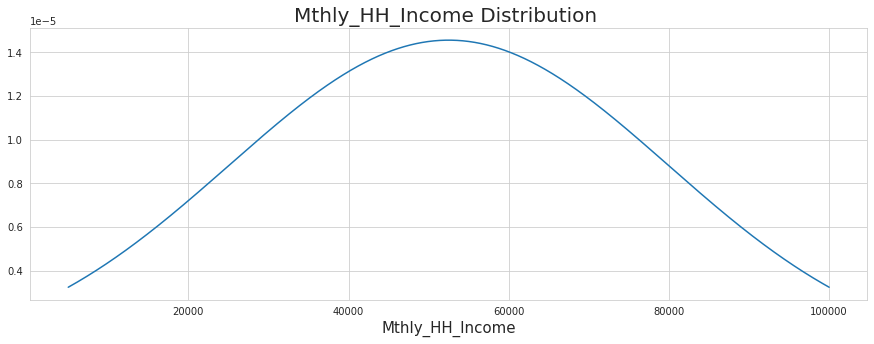

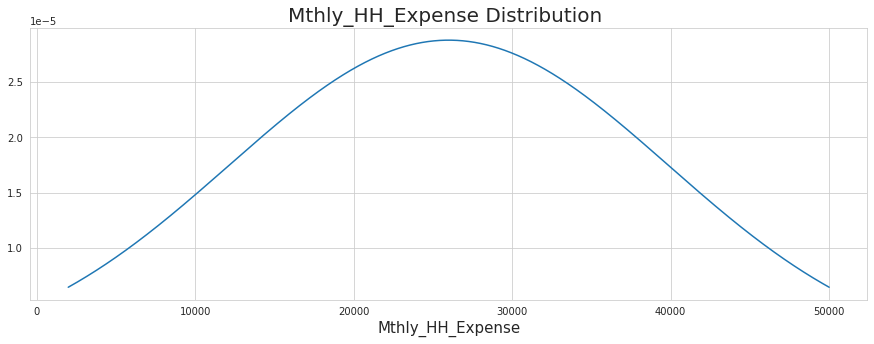

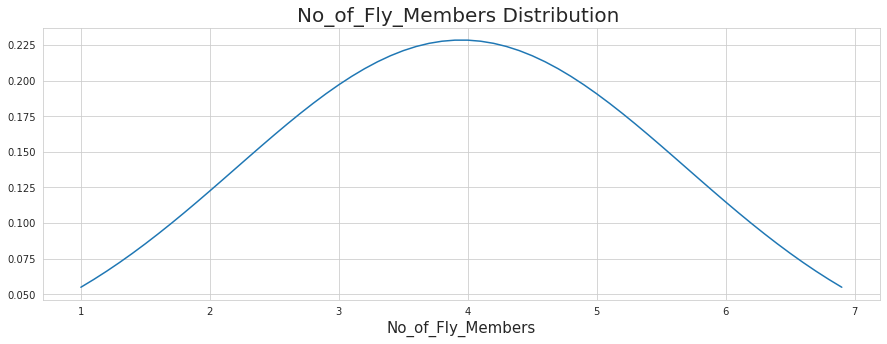

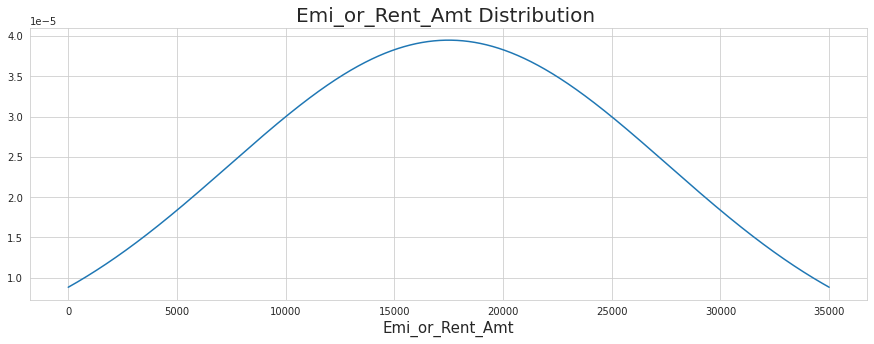

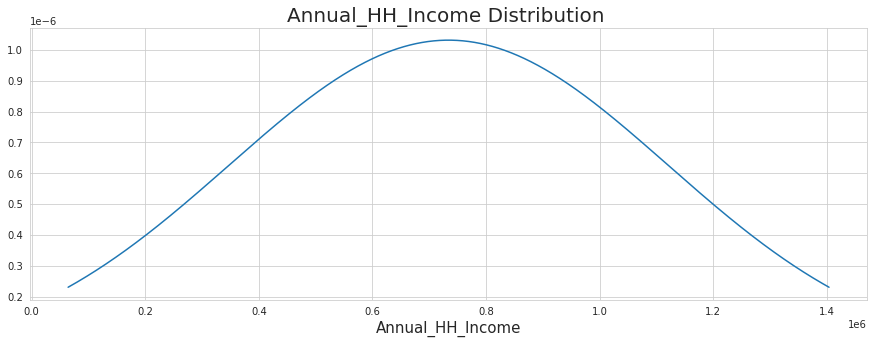

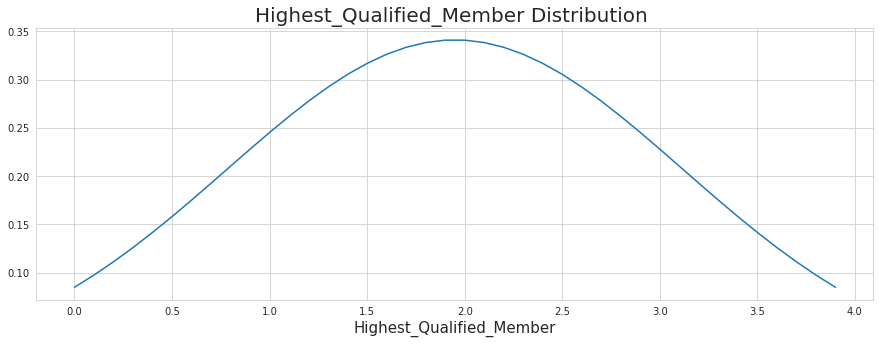

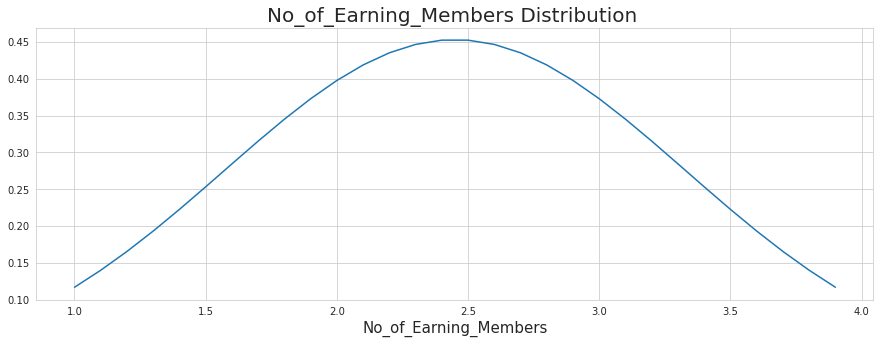

In [52]:
for clm in df.columns: 
    sns.set_style('whitegrid')    
    plt.figure(figsize=(15,5))
    plt.title(clm+' Distribution ',fontsize = 20) 
    plt.xlabel(clm , fontsize = 15) 
    x_axis = np.arange(df[clm].min(),df[clm].max(),0.1)
    mean = stats.mean(x_axis)
    sd = stats.stdev(x_axis)
    plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
    plt.show()


In [53]:
df.skew(axis = 0, skipna = True)

Mthly_HH_Income             0.924615
Mthly_HH_Expense            1.199461
No_of_Fly_Members           0.113674
Emi_or_Rent_Amt             3.403680
Annual_HH_Income            1.192949
Highest_Qualified_Member    0.169039
No_of_Earning_Members       1.593301
dtype: float64

This distribution has skew Mthly_HH_Income    0.924615
dtype: float64
This distribution has skew Mthly_HH_Expense    1.199461
dtype: float64
This distribution has skew No_of_Fly_Members    0.113674
dtype: float64
This distribution has skew Emi_or_Rent_Amt    3.40368
dtype: float64
This distribution has skew Annual_HH_Income    1.192949
dtype: float64
This distribution has skew Highest_Qualified_Member    0.169039
dtype: float64
This distribution has skew No_of_Earning_Members    1.593301
dtype: float64


<Figure size 864x1080 with 0 Axes>

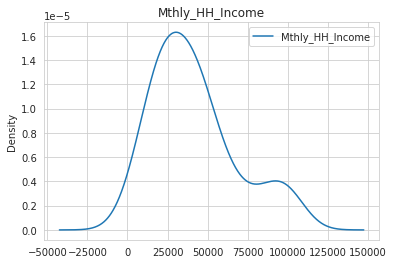

<Figure size 864x1080 with 0 Axes>

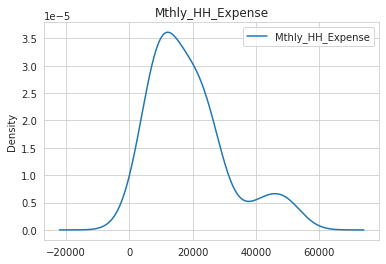

<Figure size 864x1080 with 0 Axes>

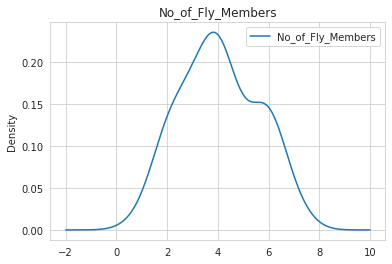

<Figure size 864x1080 with 0 Axes>

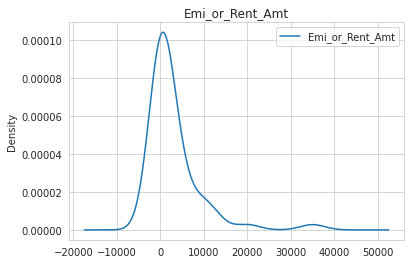

<Figure size 864x1080 with 0 Axes>

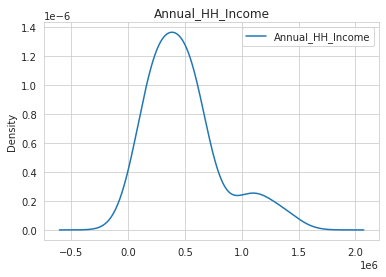

<Figure size 864x1080 with 0 Axes>

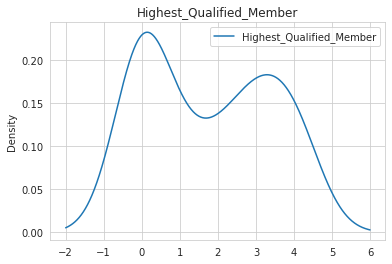

<Figure size 864x1080 with 0 Axes>

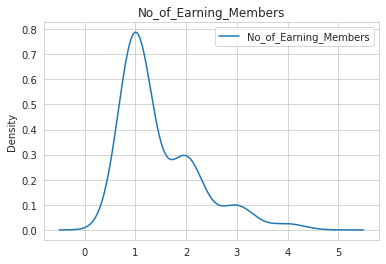

In [54]:
for clm in df.columns: 
    norm = pd.DataFrame(df[clm])
    plt.figure(figsize=(12,15))
    norm.plot(kind = 'density',title=clm,xlabel =clm)
    print('This distribution has skew', norm.skew())

##Explain QQ Plot and show the implementation of the same
  The quantile-quantile plot is a graphical method for determining whether two samples of data came from the same population or not.
   A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set.
Use The Quantile-Quantile plot is used for the following purpose: 
* Determine whether two samples are from the same population.
 * Whether two samples have the same tail 
 * Whether two samples have the same distribution shape.


Mthly_HH_Income


<Figure size 720x720 with 0 Axes>

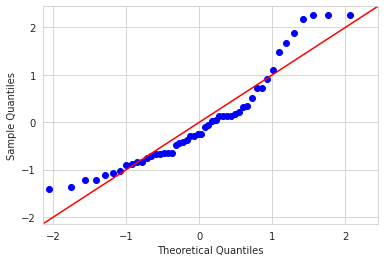

Mthly_HH_Expense


<Figure size 720x720 with 0 Axes>

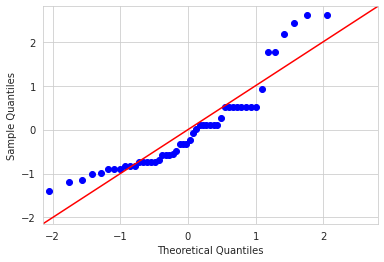

No_of_Fly_Members


<Figure size 720x720 with 0 Axes>

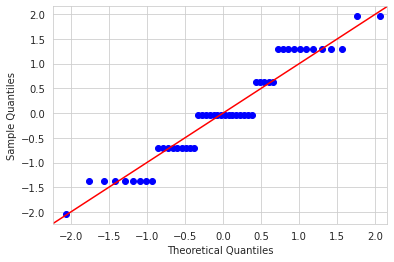

Emi_or_Rent_Amt


<Figure size 720x720 with 0 Axes>

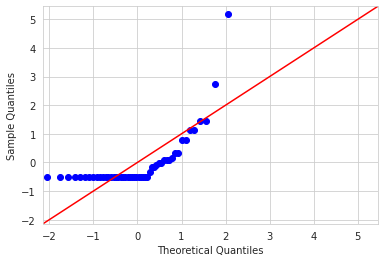

Annual_HH_Income


<Figure size 720x720 with 0 Axes>

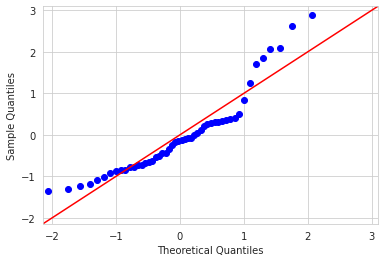

No_of_Earning_Members


<Figure size 720x720 with 0 Axes>

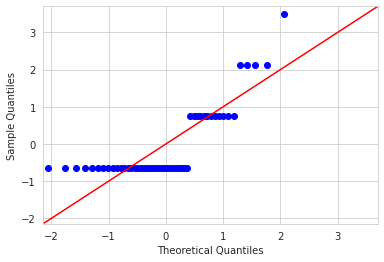

In [55]:
from statsmodels.graphics.gofplots import qqplot 
from scipy.stats import norm, uniform
def plot_qqplt(clm):       
    plt.figure(figsize=(10,10)) 
    print(clm)
    sm.qqplot(df[clm], line ='45',fit=True,dist=norm)
    plt.show()
for clm in df.columns:
    if clm == 'Highest_Qualified_Member':
        pass
    else:
        plot_qqplt(clm)

##Box Cox and show the implementation of the same
  a transformation of non-normal dependent variables into a normal shape

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Lambda value for transformation: 0.3031376789702236
Lambda value for transformation: 0.18883043817938627
Lambda value for transformation: 0.7285345436264526


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


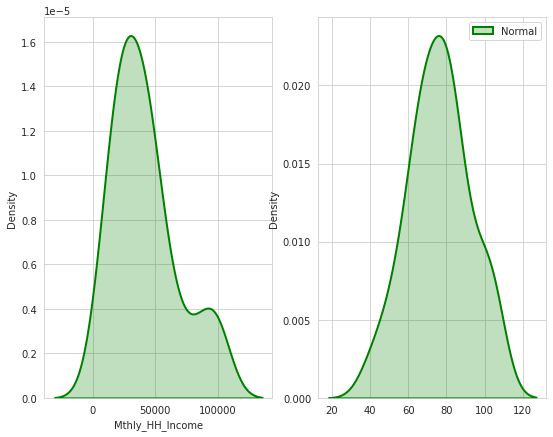

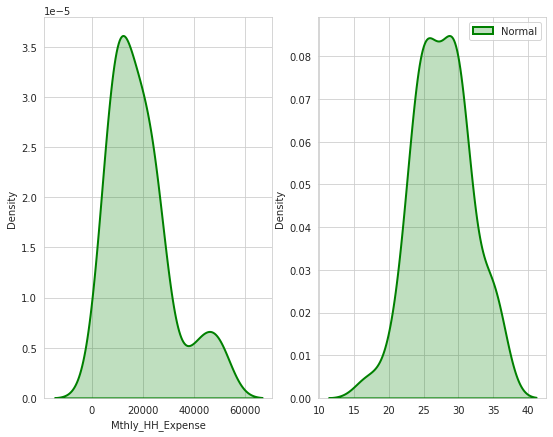

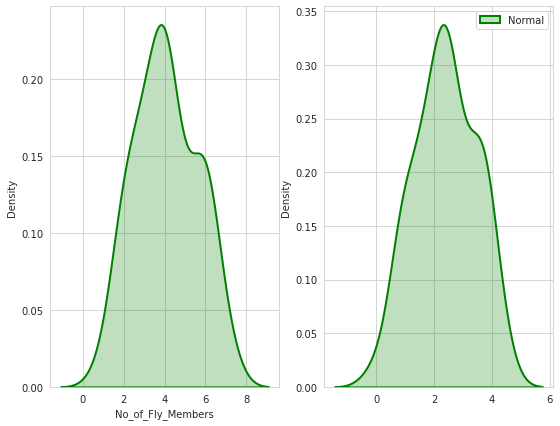

In [56]:

from scipy import stats
def boxcoxwiskers(original_data):
    fitted_data, fitted_lambda = stats.boxcox(df[original_data])
    fig, ax = plt.subplots(1, 2)
    sns.distplot(df[original_data], hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2}, 
                label = "Non-Normal", color ="green", ax = ax[0])
    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2}, 
                label = "Normal", color ="green", ax = ax[1])
    plt.legend(loc = "upper right")
    fig.set_figheight(7)
    fig.set_figwidth(9)

    print(f"Lambda value for transformation: {fitted_lambda}")
for clm in df.columns[:3]:
    boxcoxwiskers(clm)